# Traffic Indicators on I-94

## Introduction

In this project, we will analyze a dataset about the westbound traffic on the I-94 Interstate highway using a [data set](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) made available by John Hogue. I-94 runs from Billings, Montana, to Port Huron, Michigan through the Great Lakes region in the northern United States. Our data set tracks westbound traffic volume in addition to weather, temperature, date/time, and whether the day was a holiday. The data was acquired from a station located approximately midway between Minneapolis and Saint Paul.

The goal of our analysis is to determine some indicators of heavy traffic on I-94--indicators such as weather type, time of the day, time of the week, etc. with the goal of avoiding future traffic ourselves when headed west on I-94.

### Importing and Inspecting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
traffic = pd.read_csv('../Datasets/Metro_Interstate_Traffic_Volume.csv')

| variable | type | description |
| --- | --- | --- |
| holiday | Categorical | US National holidays plus regional holiday, Minnesota State Fair |
| temp | Numeric | Average temp in kelvin |
| rain_1h | Numeric | Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric | Amount in mm of snow that occurred in the hour |
| clouds_all | Numeric | Percentage of cloud cover |
| weather_main | Categorical | Short textual description of the current weather |
| weather_description | Categorical | Longer textual description of the current weather |
| date_time | DateTime | Hour of the data collected in local CST time |
| traffic_volume | Numeric | Hourly I-94 ATR 301 reported westbound traffic volume |

Let's take a quick look at the data

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Let's inspect the distribution of our main variable, `traffic_volume`.

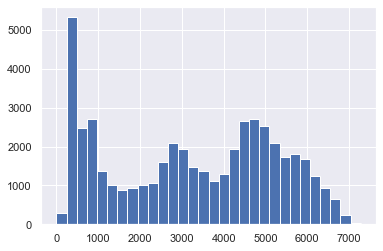

In [5]:
plt.hist(traffic['traffic_volume'], bins=30)
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Westbound traffic on I-94 shows a trimodal distribution, indicating that it has three common states: low--roughly 250-500 cars hourly; medium--roughly 3000 cars hourly; or high--roughly 4500-5000 cars hourly. These roughly track our data's 25th, 50th, and 75th percentile.

## Analyzing the Data

One obvious factor that may regularly traffic volume is time of day. Thus, we'll first take a look at how time of day affects traffic volume.

### Effects of Day vs. Night

The first way we'll look into time effects is categorically, dividing the data into daytime and night time subsets. First, though, we'll change the type of the `date_time` variable into datetime.

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

Now we'll get the hour of each entry to use this in separating the data into day and night.

In [8]:
traffic['hour'] = traffic['date_time'].dt.hour

In [9]:
traffic['hour'].describe()

count    48204.000000
mean        11.398162
std          6.940238
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: hour, dtype: float64

Hours run from 0 to 23. We might resonably consider daytime hours to be 7:00 am - 7:00 pm and night time hours to be 7:00 pm - 7:00 am. 

In [10]:
daynight = {}
daynight['Day'] = traffic[(traffic['hour'] > 7) & (traffic['hour'] <= 19)]
daynight['Night'] = traffic[(traffic['hour'] <= 7) | (traffic['hour'] > 19)]

Now, let's have a look at the distribution of traffic volume for day and night.

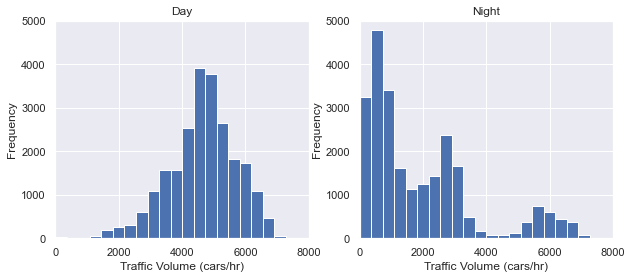

In [11]:
times = ['Day', 'Night']
plt.figure(figsize=(10,4))

for i, time in zip(range(1,3), times):
    plt.subplot(1,2,i)
    plt.hist(daynight[time]['traffic_volume'], bins=20)
    plt.title(time)
    plt.xlabel('Traffic Volume (cars/hr)')
    plt.ylabel('Frequency')
    plt.xlim([0,8000])
    plt.ylim([0,5000])
    
plt.show()

In [12]:
for t in times:
    print(t)
    print(daynight[t]['traffic_volume'].describe())
    print('\n')

Day
count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64


Night
count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64




It's clear from these graphs that the two times of day have very different distributions. Daytime traffic seems to be unimodal with a slight negative skew. The daytime peak is around 5000 cars/hr. Night time traffic, however, seems to be trimodal, similar to the overall data set, with a strong low traffic peak, a weaker medium traffic peak, and a small high traffic peak. 

### Effects of Hour of Day

Now let's inspect the traffic by time in a more granular way by inpecting hourly traffic. First, we'll get make a plot that helps us see the distribution, then we'll plot the average hourly traffic.

In [13]:
hourly_avgs = traffic.groupby('hour').mean()[['traffic_volume']].reset_index()

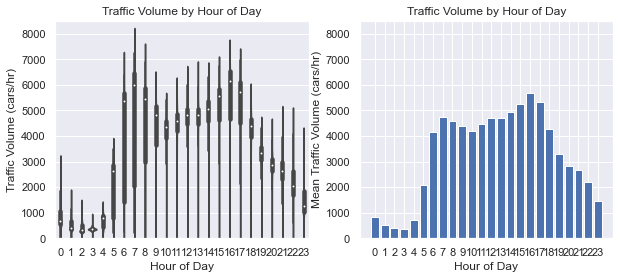

In [14]:
plt.figure(figsize=(10,4))

# Violin Plot
plt.subplot(1,2,1)
sns.violinplot(data = traffic, x = "hour",
             y = "traffic_volume")
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Hour of Day")
plt.ylim([0,8500])

# Bar Plot of Averages
plt.subplot(1,2,2)
plt.bar(hourly_avgs['hour'], hourly_avgs['traffic_volume'])
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Hour of Day")
plt.ylim([0,8500])

plt.show()

These plots show that from the hours of roughly 11:00 pm (23:00) to 5:00 am, traffic is relatively calm. However, between about 6:00 am and 6:00 pm, traffic is at its highest, with the hours of 6:00 - 8:00 am and 3:00 - 5:00 pm (15:00 - 17:00) being the most variable. The highest average traffic is from 3:00 - 5:00 pm, and the lowest average traffic is from 1:00 - 3:00 am.

### Effect of Month on Traffic

Next, we'll look into effects of month of the year on traffic volume.

First, we'll add a month variable to our data set.

In [15]:
traffic['month'] = traffic['date_time'].dt.month

In [16]:
traffic['month'].describe()

count    48204.000000
mean         6.506037
std          3.400221
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

Next, we'll get the average monthly traffic and plot the distribution and the average.

In [17]:
monthly_avgs = traffic.groupby('month').mean()[['traffic_volume']].reset_index()

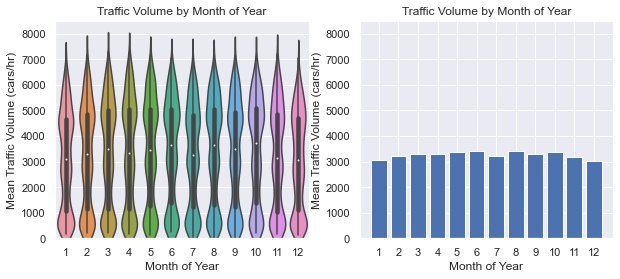

In [18]:
plt.figure(figsize=(10,4))

# Violin Plot
plt.subplot(1,2,1)
sns.violinplot(data = traffic, x = "month",
             y = "traffic_volume")
plt.xlabel('Month of Year')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Month of Year")
plt.ylim([0,8500])

# Bar Plot of Averages
plt.subplot(1,2,2)
plt.bar(monthly_avgs['month'], monthly_avgs['traffic_volume'])
plt.xticks(range(1,13))
plt.xlabel('Month of Year')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Month of Year")
plt.ylim([0,8500])

plt.show()

The violin plot is very difficult to discern, and the average differences are hard to see without zooming the plot in, so let's do that.

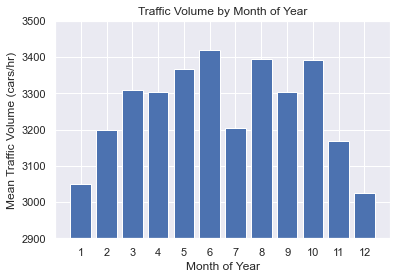

In [19]:
plt.bar(monthly_avgs['month'], monthly_avgs['traffic_volume'])
plt.xlabel('Month of Year')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Month of Year")
plt.xticks(range(1,13))
plt.ylim([2900,3500])

plt.show()

These figures show that average traffic does not change dramatically across months, but is highest in June, August, and October and lowest from January to December. Average traffic ramps up slightly from winter to summer and back down as winter approaches, with the interesting exception that traffic dips in July.

### Effect of Day of the Week on Traffic

Next, we'll look at effects of weekday on traffic. We'll follow the same protocol, creating a day variable, then averaging and plotting by day.

In [20]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek

In [21]:
traffic['dayofweek'].describe()

count    48204.000000
mean         2.984980
std          2.005941
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: dayofweek, dtype: float64

Day of week is described by the numbers 0 (Monday) to 7 (Sunday).

In [22]:
daily_avgs = traffic.groupby('dayofweek').mean()[['traffic_volume']].reset_index()

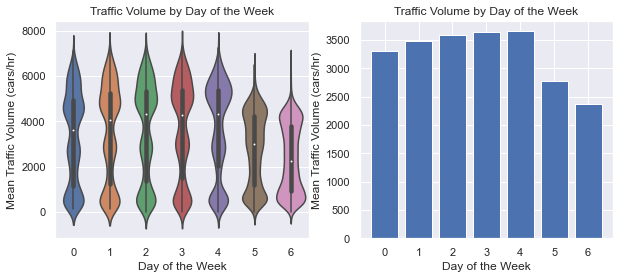

In [23]:
plt.figure(figsize=(10,4))

# Violin Plot
plt.subplot(1,2,1)
sns.violinplot(data = traffic, x = "dayofweek",
             y = "traffic_volume")
plt.xlabel('Day of the Week')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Day of the Week")
#plt.ylim([0,8500])

# Bar Plot of Averages
plt.subplot(1,2,2)
plt.bar(daily_avgs['dayofweek'], daily_avgs['traffic_volume'])
plt.xticks(range(0,7))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Traffic Volume (cars/hr)')
plt.title("Traffic Volume by Day of the Week")
#plt.ylim([0,8500])

plt.show()

We can see by these plots that traffic is much lower on average on weekends compared to during the week, and the average slowly ramps up from Monday to Friday fairly regularly, with the overall trend looking very similar across the business week. Interestingly, the violin plots during the week show the trimodal tendency seen in the overall data, with the largest frequency being in high traffic times.

Because of these data, we may want to reconsider the hourly trends, which may be different from business days to weekends. 

### Effect of Time of Day by Business Day vs. Weekend on Traffic

In [24]:
traffic['business_day'] = np.where(traffic['dayofweek'] <= 4, 'Business Day', 'Weekend')

In [25]:
traffic['business_day'].value_counts()

Business Day    34501
Weekend         13703
Name: business_day, dtype: int64

Now, take the averages per hour, grouping  by the `business_day` variable.

In [26]:
business_day_avgs = traffic.groupby(['business_day', 'hour']).mean()[['traffic_volume']].reset_index()

Now plot.

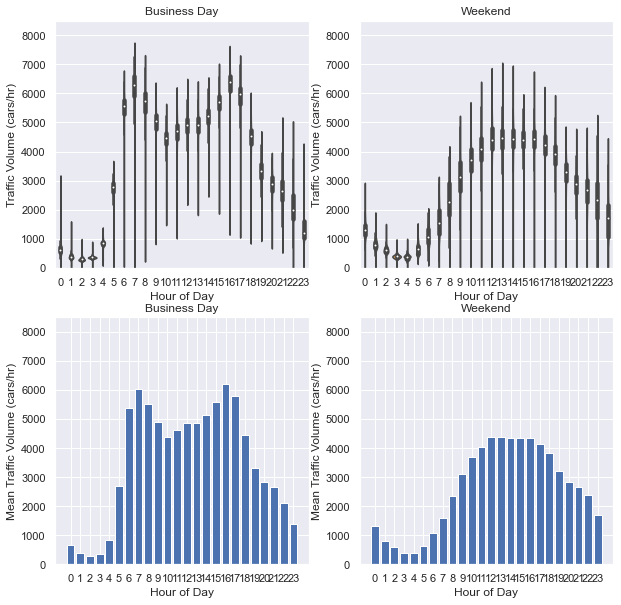

In [27]:
plt.figure(figsize=(10,10))

# Violin Plots
for i, day in zip(range(1,3), traffic['business_day'].unique()):
    plt.subplot(2,2,i)
    sns.violinplot(data = traffic[traffic['business_day'] == day], x = "hour",
                 y = "traffic_volume")
    plt.xlabel('Hour of Day')
    plt.ylabel('Traffic Volume (cars/hr)')
    plt.title(day)
    plt.ylim([0,8500])

# Bar Plots of Averages
for i, day in zip(range(3,5), traffic['business_day'].unique()):
    plt.subplot(2,2,i)
    plt.bar(business_day_avgs.loc[business_day_avgs['business_day']==day,'hour'], business_day_avgs.loc[business_day_avgs['business_day']==day,'traffic_volume'])
    plt.xticks(range(0,24))
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Traffic Volume (cars/hr)')
    plt.title(day)
    plt.ylim([0,8500])

plt.show()


These plots make clear that the weekday traffic trend is more strongly bimodal, with traffic peaking in the pre-work rush hour around 7:00 am and in the post-work rush hour around 4:00 pm (16:00). Traffic stays relatively high during weekdays bewteen 6:00 am and 6:00 pm. 

On weekends, the distribution is strongly unimodal, looking roughly the same as weekdays if the pre- and post-work peaks were shaved down and the distribution were moved roughly three hours later. Traffic on weekeds has a lower peak, but is strongest between 8:00 am and 10:00 pm.

### Influence of Weather on Traffic

We have already seen that winter traffic is lower than summer traffic, suggesting heat and weather may have a strong influence. Given that we have weather variables to inspect, we can now take a look at those.

Here, we can take a more correlational approach, looking directly at the relationship between traffic volume and our weather variables, `temp`, `rain_1h`, `snow_1h`, and `clouds_all`. We also have descriptive variables, `weather_main` and `weather_description`, which are non-numeric. We might treat these categorically.

First, let's look at a description of these variables.

In [28]:
print(traffic[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']].head())

     temp  rain_1h  snow_1h  clouds_all weather_main weather_description
0  288.28      0.0      0.0          40       Clouds    scattered clouds
1  289.36      0.0      0.0          75       Clouds       broken clouds
2  289.58      0.0      0.0          90       Clouds     overcast clouds
3  290.13      0.0      0.0          90       Clouds     overcast clouds
4  291.14      0.0      0.0          75       Clouds       broken clouds


In [29]:
traffic[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']].describe()

,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231
std,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000
50%,282.450000,0.000000,0.000000,64.000000
75%,291.806000,0.000000,0.000000,90.000000
max,310.070000,9831.300000,0.510000,100.000000


#### Numerical Weather Variables

Now, let's look at the correlation of traffic volume with the numerical weather variables.

Temperature has some points listed as 0 Kelvin, which is impossible, so we'll omit those first.

In [30]:
traffic = traffic[traffic['temp'] > 0]
traffic[['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()['traffic_volume']

traffic_volume    1.000000
temp              0.132291
rain_1h           0.004713
snow_1h           0.000728
clouds_all        0.066819
Name: traffic_volume, dtype: float64

In [31]:
from scipy.stats import pearsonr
print(pearsonr(traffic['temp'], traffic['traffic_volume']))
print(pearsonr(traffic['rain_1h'], traffic['traffic_volume']))
print(pearsonr(traffic['snow_1h'], traffic['traffic_volume']))
print(pearsonr(traffic['clouds_all'], traffic['traffic_volume']))


(0.1322913150731313, 4.711844607274486e-187)
(0.004712915739127605, 0.3008503727710395)
(0.0007280256973201578, 0.8730226188631983)
(0.06681862812544904, 8.065588036878077e-49)


It looks like there are significant correlations of traffic volume with both temperature (r = .13) and percentage of cloud cover (r = .07). Both are positive, indicating that traffic volume increases with increased temperature, and paradoxically, increased cloud cover. 

Let's see what these correlations look like when plotted.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


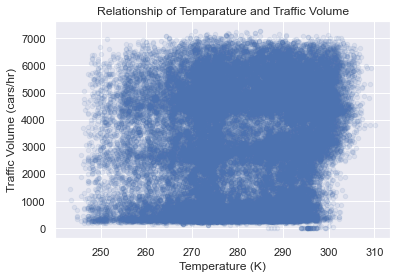

In [32]:
traffic[traffic['temp'] > 0].plot.scatter(x='temp',
                     y='traffic_volume', alpha=.1)
plt.xlabel('Temperature (K)')
plt.ylabel('Traffic Volume (cars/hr)')
plt.title('Relationship of Temparature and Traffic Volume')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


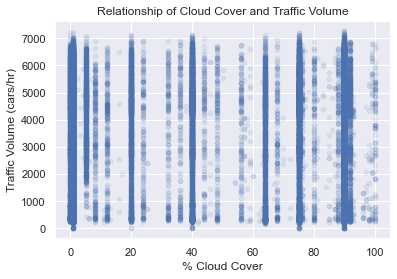

In [33]:
traffic.plot.scatter(x='clouds_all',
                     y='traffic_volume', alpha=.1)
plt.xlabel('% Cloud Cover')
plt.ylabel('Traffic Volume (cars/hr)')
plt.title('Relationship of Cloud Cover and Traffic Volume')
plt.show()

Neither Temperature nor cloud cover have a strong predictive value for traffic volume, as is clear from their low correlation values and scatter plots showing no obvious relationship between the variables. While statistical tests show a very small relationship between these variables and traffic volume, they account for very little variance in traffic and would not individually be good indicators of the predicted traffic volume.

#### Categorical Weather Variables

Now, let's look at the categorical weather variables.

We'll first take a look at the unique values and their counts for both variables. Weather description seems to have some duplicates due to capitalization, so we'll make all entries lowercase.

In [34]:
w_main_counts = traffic['weather_main'].value_counts()
print(w_main_counts)
w_main_unique = traffic['weather_main'].unique()

Clouds          15164
Clear           13381
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


In [35]:
traffic['weather_description'].str.lower()

0              scattered clouds
1                 broken clouds
2               overcast clouds
3               overcast clouds
4                 broken clouds
                  ...          
48199             broken clouds
48200           overcast clouds
48201    proximity thunderstorm
48202           overcast clouds
48203           overcast clouds
Name: weather_description, Length: 48194, dtype: object

In [36]:
w_desc_counts = traffic['weather_description'].str.lower().value_counts()
print(w_desc_counts)

sky is clear                           13381
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain              54
proximity 

We're going to get the average traffic volume for each category and compare them, but we don't want to take the average traffic across labels with very few points, because those averages will be less reliable indicators of what the traffic volume is likely to be. Therefore, we'll set a cutoff at greater than or equal to twenty entries with a given label and average across those for each category.

First, let's subset the main dataframe for each variable with greater than 20 entries.

In [37]:
traffic_w_main_20 = traffic[traffic['weather_main'].isin(w_main_counts[w_main_counts >= 20].index)]
traffic_w_desc_20 = traffic[traffic['weather_description'].isin(w_desc_counts[w_desc_counts >= 20].index)]

Now, let's get the average for each label in these two variables for their respective data and plot them.

In [38]:
w_main_means = traffic_w_main_20.groupby('weather_main').mean()[['traffic_volume']].reset_index().sort_values('traffic_volume')
w_desc_means = traffic_w_desc_20.groupby('weather_description').mean()[['traffic_volume']].reset_index().sort_values('traffic_volume')

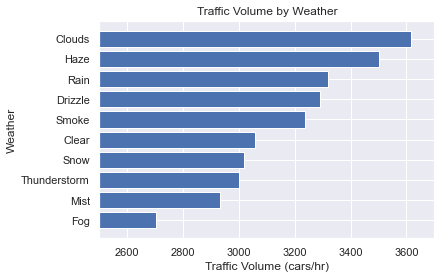

In [39]:
plt.barh(y=w_main_means['weather_main'], width=w_main_means['traffic_volume'] )
plt.xlim(2500,3700)
plt.title('Traffic Volume by Weather')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Weather')
plt.show()

This plot shows that cloudy and hazy days increase traffic volume the most compared to clear weather, though rain, drizzle and smoke also cause some increase. On the other hand, fog decreases traffic volume the most, though snow, thunderstorm, and mist do as well.

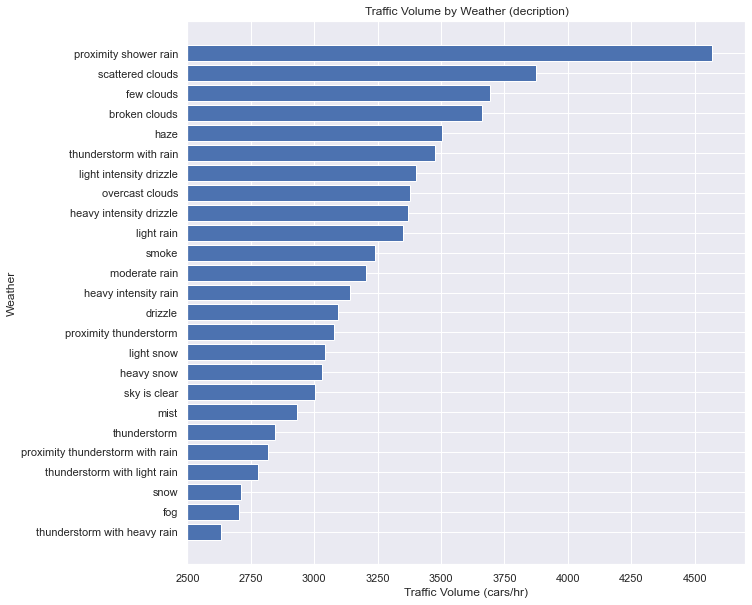

In [40]:
plt.figure(figsize=(10,10))
plt.barh(y=w_desc_means['weather_description'], width=w_desc_means['traffic_volume'] )
plt.xlim(2500,4700)
plt.title('Traffic Volume by Weather (decription)')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Weather')
plt.show()

Looking at the more granular descriptions, it is clear that proximity shower rains increase traffic volume most strongly, adding roughly 750 more cars per hour compared to the next worst weather description, scattered clouds. Thunderstorms with heavy rain cause less traffic than any other weather description.

## Conclusions

In looking for indicators of traffic on I-94 westbound we found many useful results. First, there is more high volume traffic during the day than during the night. No surprise there, given that most people live their working lives and run most errands during the day. Second, traffic tends to increase throughout the day, no matter the day, but weekdays--business days--have strong peaks pre-work around 7:00 am and post-work around 4:00 pm. Third, we observed that there is not a large variation in traffic across months of the year, but the average traffic volume tends to be higher during the summer months (with the exception of July) compared to the winter months. This may be due to the fact that winter months entail snow, which people likely want to avoid. Fifth, weekday traffic is heavier than weekend traffic. People like to rest on the weekend--imagine that! Finally, we found that numerical weather indicators did not show a strong relationship to traffic, but some weather descriptions indicate higher or lower traffic trends: proximity rain showers slow traffic dramatically compared to other weather, whereas thunderstorms with heavy rain tend to keep people off of the road. It appears that people believe they can handle rain showers, but when there is thunder they prefer to stay inside.

Thus, if my business were to minimize the traffic faced on I-94, I would have my drivers deliver westbound at night, during the weekends, during the winter, and during heavy thunderstorms and fog. Of course, we might want to factor which of these same traffic indicators may increase risk of car accidents before we make any such decision.